In [18]:
from emir import (GANDeficiencyArgs,GANDeficiencyEstimator, GANTrickedDeficiencyEstimator, WassersteinDeficiencyEstimator, WassersteinGPDeficiencyEstimator)
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.datasets import make_blobs

import matplotlib.patches as mpatches

# create logger
import logging
logging.basicConfig(level=logging.INFO)


In [19]:
# Make two embeddings datasets XU, XZ with 2D embeddings

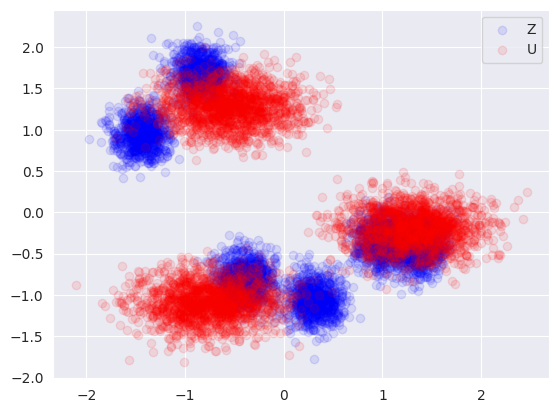

In [20]:
# Make 2 2d gaussians with different means and covariances


XZ = make_blobs(n_samples=5000, n_features=2, centers=6, cluster_std=5.0, center_box=(-50, 50), shuffle=True, random_state=None)
XU = make_blobs(n_samples=5000, n_features=2, centers=3, cluster_std=5.0, center_box=(-50, 50), shuffle=True, random_state=None)

# normalize the data
XZ = (XZ[0] - XZ[0].mean(axis=0)) / XZ[0].std(axis=0)
XU = (XU[0] - XU[0].mean(axis=0)) / XU[0].std(axis=0)

# plot the data
plt.scatter(XZ[:,0], XZ[:,1], c="blue", alpha=0.1, label="Z")
plt.scatter(XU[:,0], XU[:,1], c="red", alpha=0.1, label="U")

plt.legend()



In [21]:
args = GANDeficiencyArgs(device='cpu', 
                         disc_clip=0.01, 
                         gen_hidden_dim=16, 
                         gen_n_layers=5,
                         critic_n_layers=3,
                         critic_hidden_dim=8,
                         critic_repeats=5, 
                         gan_n_epochs=100, 
                         gen_lr=2e-4, 
                         critic_lr=2e-4,
                         gan_batch_size=64,
                         )
estimator = WassersteinGPDeficiencyEstimator(args, x_dim=2, y_dim=2)


In [26]:
U = torch.tensor(XU, dtype=torch.float32)
Z = torch.tensor(XZ, dtype=torch.float32)

estimator.fit_estimator(Z, U)

INFO:emir.estimators.deficiency_estimator:Epoch 1/100, Critic loss: -0.7578884363174438, Generator loss: -2.509493827819824
INFO:emir.estimators.deficiency_estimator:Epoch 2/100, Critic loss: -0.2634778618812561, Generator loss: -2.567837953567505
INFO:emir.estimators.deficiency_estimator:Epoch 3/100, Critic loss: -0.6413275599479675, Generator loss: -3.684516191482544
INFO:emir.estimators.deficiency_estimator:Epoch 4/100, Critic loss: -1.755425214767456, Generator loss: -3.1439831256866455
INFO:emir.estimators.deficiency_estimator:Epoch 5/100, Critic loss: -0.527355968952179, Generator loss: -6.4306182861328125
INFO:emir.estimators.deficiency_estimator:Epoch 6/100, Critic loss: -0.24894197285175323, Generator loss: -6.3356614112854
INFO:emir.estimators.deficiency_estimator:Epoch 7/100, Critic loss: -0.014674815349280834, Generator loss: -1.8284567594528198
INFO:emir.estimators.deficiency_estimator:Epoch 8/100, Critic loss: -0.2998201847076416, Generator loss: -4.306141376495361
INFO:e

In [27]:

Uchap = estimator.gen(Z).detach().numpy()

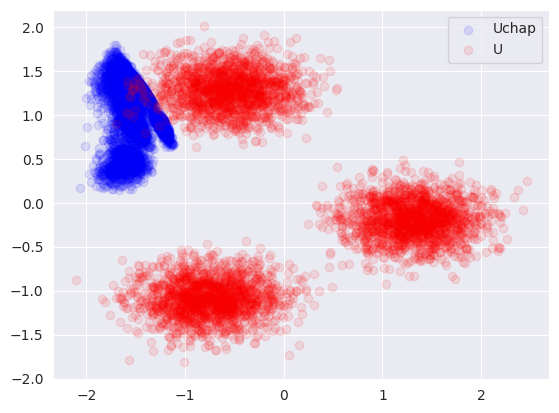

In [28]:
plt.scatter(Uchap[:,0], Uchap[:,1], c="blue", alpha=0.1, label="Uchap")
plt.scatter(XU[:,0], XU[:,1], c="red", alpha=0.1, label="U")
plt.legend()

Text(0.5, 1.0, 'Generator loss')

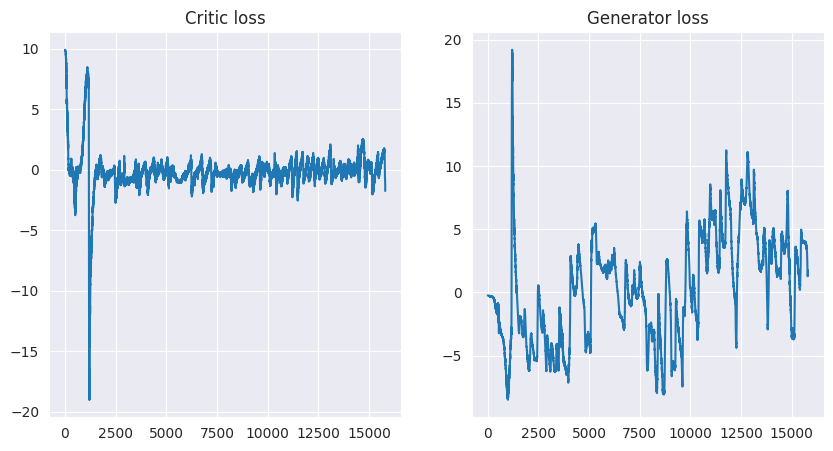

In [29]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# print recorded losses
crit_loss = estimator.recorded_critic_loss
gen_loss = estimator.recorded_gen_loss

ax[0].plot(crit_loss, label="Critic loss")
ax[1].plot(gen_loss, label="Generator loss")

ax[0].set_title("Critic loss")
ax[1].set_title("Generator loss")
